# ATP Tennis Data - Player Diff Stats + One Hot Encoding (All Categorical Data)


In our previous notebooks, we saw that Decision Tree is still the best algorithm when we used the data set where we used player diff stats and with one hot encoded category data

In this notebook, we will run the same models with the same dataset but use data from 1985 to 2018 to see how this affects our accruacy

### Results from Decision Tree Classifier with player diff + OHE (1998 to 2018):

```
Model Score: 0.925793382849426

ROC/AUC Score: 0.9257583124191925

              precision    recall  f1-score   support

        Loss       0.92      0.93      0.93      7453
         Win       0.93      0.92      0.92      7357

    accuracy                           0.93     14810
   macro avg       0.93      0.93      0.93     14810
weighted avg       0.93      0.93      0.93     14810
```

# Summary of Results

Looks like having more data made our DT model perform better. Accuracy is up around 1.5%

```
Model Score: 0.9404228058936579

ROC/AUC Score: 0.9404009956149442
              precision    recall  f1-score   support

        Loss       0.94      0.95      0.94     12536
         Win       0.95      0.93      0.94     12440

    accuracy                           0.94     24976
   macro avg       0.94      0.94      0.94     24976
weighted avg       0.94      0.94      0.94     24976
```




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, REPORT_FILE, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff-ohe-1985"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-diff-ohe.csv'

START_YEAR = 1985
END_YEAR = 2018




In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

# Logistic Regression

In [33]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6636370916079436

ROC/AUC Score: 0.6636393553126482
              precision    recall  f1-score   support

        Loss       0.67      0.66      0.66     12536
         Win       0.66      0.66      0.66     12440

    accuracy                           0.66     24976
   macro avg       0.66      0.66      0.66     24976
weighted avg       0.66      0.66      0.66     24976

      Loss   Win
Loss  8312  4224
Win   4177  8263


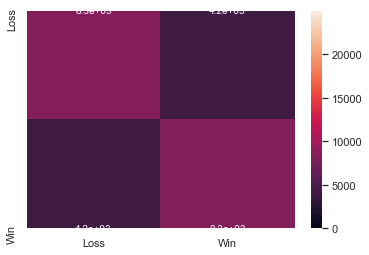

In [34]:
lr.analyze()

In [35]:
# ju.plot_2d(X_test, y_predict_lr)

In [36]:
lr.save()

Saving report: ../reports/summary.csv


# KNN

In [7]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.8349615631005766

ROC/AUC Score: 0.8348911020505319
              precision    recall  f1-score   support

        Loss       0.82      0.85      0.84     12536
         Win       0.85      0.82      0.83     12440

    accuracy                           0.83     24976
   macro avg       0.84      0.83      0.83     24976
weighted avg       0.84      0.83      0.83     24976

       Loss    Win
Loss  10696   1840
Win    2282  10158


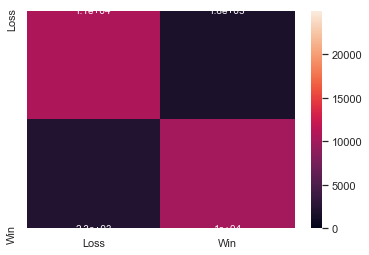

In [8]:
knn.analyze()

In [9]:
# ju.plot_2d(X_test, y_predict_knn)

In [10]:
knn.save()

Saving report: ../reports/summary.csv


# Decision Tree

In [11]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.9404228058936579

ROC/AUC Score: 0.9404009956149442
              precision    recall  f1-score   support

        Loss       0.94      0.95      0.94     12536
         Win       0.95      0.93      0.94     12440

    accuracy                           0.94     24976
   macro avg       0.94      0.94      0.94     24976
weighted avg       0.94      0.94      0.94     24976

       Loss    Win
Loss  11860    676
Win     812  11628


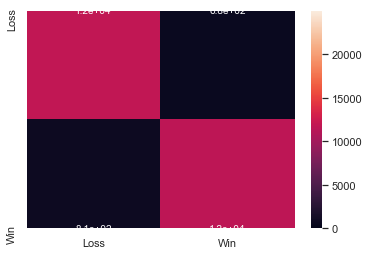

In [12]:
dt.analyze()

In [13]:
# ju.plot_2d(X_test, y_predict_dt)

In [14]:
dt.save()

Saving report: ../reports/summary.csv


# Random Forest Classifier

In [15]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   17.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


Model Score: 0.7986867392696989

ROC/AUC Score: 0.7985381778933264
              precision    recall  f1-score   support

        Loss       0.78      0.84      0.81     12536
         Win       0.82      0.76      0.79     12440

    accuracy                           0.80     24976
   macro avg       0.80      0.80      0.80     24976
weighted avg       0.80      0.80      0.80     24976

       Loss   Win
Loss  10495  2041
Win    2987  9453


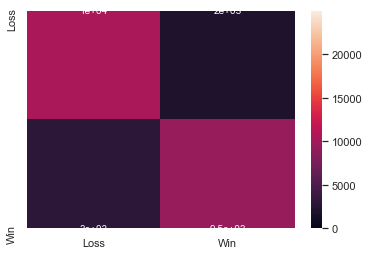

In [16]:
rf.analyze()

In [17]:
# ju.plot_2d(X_test, y_predict_rf)

In [18]:
rf.save()

Saving report: ../reports/summary.csv


# Gradient Boosting

In [19]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3181           22.37m
         2           1.2625           23.21m
         3           1.2162           23.52m
         4           1.1794           23.94m
         5           1.1486           25.89m
         6           1.1216           26.28m
         7           1.0915           25.95m
         8           1.0720           25.32m
         9           1.0483           24.96m
        10           1.0279           24.64m
        20           0.9040           21.55m
        30           0.8425           18.84m
        40           0.7998           16.23m
        50           0.7712           13.42m
        60           0.7495           10.33m
        70           0.7277            7.51m
        80           0.7109            4.90m
        90           0.6985            2.41m
       100           0.6869            0.00s


Model Score: 0.8571428571428571

ROC/AUC Score: 0.8570336338098687
              precision    recall  f1-score   support

        Loss       0.84      0.89      0.86     12536
         Win       0.88      0.83      0.85     12440

    accuracy                           0.86     24976
   macro avg       0.86      0.86      0.86     24976
weighted avg       0.86      0.86      0.86     24976

       Loss    Win
Loss  11100   1436
Win    2132  10308


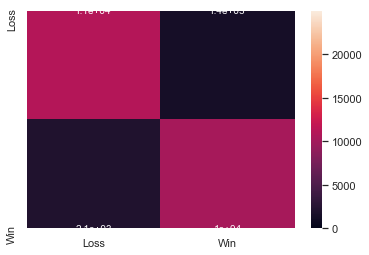

In [20]:
gb.analyze()

In [21]:
# ju.plot_2d(X_test, y_predict_gb)

In [22]:
gb.save()

Saving report: ../reports/summary.csv


# AdaBoost

In [23]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.7523222293401666

ROC/AUC Score: 0.7521957598130247
              precision    recall  f1-score   support

        Loss       0.74      0.79      0.76     12536
         Win       0.77      0.72      0.74     12440

    accuracy                           0.75     24976
   macro avg       0.75      0.75      0.75     24976
weighted avg       0.75      0.75      0.75     24976

      Loss   Win
Loss  9842  2694
Win   3492  8948


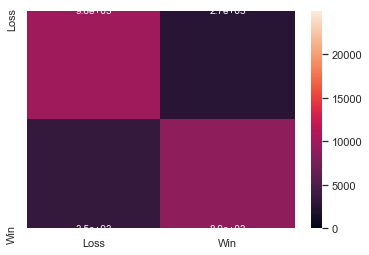

In [24]:
ab.analyze()

In [25]:
# ju.plot_2d(X_test, y_predict_ab)

In [26]:
ab.save()

Saving report: ../reports/summary.csv


# Results

* Decision Tree is still our best model
* no significant improvement for Adaboost
* We did see significant improvement for KNN when we used this dataset
* Gradient Boosting, Logistic Regression, Random Forest all did worse with this dataset

In [37]:
report = pd.read_csv(REPORT_FILE)
report.tail(5)

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min
98,DecisionTreeClassifier,diff-ohe-1985,../datasets/atp_matches_1985-2019_features-dif...,1985,2018,0.940423,0.940401,"{""0"": {""0"": 11860, ""1"": 812}, ""1"": {""0"": 676, ...","{""Loss"": {""precision"": 0.9359217171717171, ""re...",../models/decisiontreeclassifier-1985-2018-dif...,0.0,0.0,0.0
99,RandomForestClassifier,diff-ohe-1985,../datasets/atp_matches_1985-2019_features-dif...,1985,2018,0.798687,0.798538,"{""0"": {""0"": 10495, ""1"": 2987}, ""1"": {""0"": 2041...","{""Loss"": {""precision"": 0.7784453345201009, ""re...",../models/randomforestclassifier-1985-2018-dif...,0.0,0.0,0.0
100,GradientBoostingClassifier,diff-ohe-1985,../datasets/atp_matches_1985-2019_features-dif...,1985,2018,0.857143,0.857034,"{""0"": {""0"": 11100, ""1"": 2132}, ""1"": {""0"": 1436...","{""Loss"": {""precision"": 0.8388754534461911, ""re...",../models/gradientboostingclassifier-1985-2018...,0.0,24.0,24.0
101,AdaBoostClassifier,diff-ohe-1985,../datasets/atp_matches_1985-2019_features-dif...,1985,2018,0.752322,0.752196,"{""0"": {""0"": 9842, ""1"": 3492}, ""1"": {""0"": 2694,...","{""Loss"": {""precision"": 0.7381130943452827, ""re...",../models/adaboostclassifier-1985-2018-diff-oh...,0.0,2.0,2.0
102,DecisionTreeClassifier,diff-ohe-matchup_diff-1985-gridsearchCV,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.935381,0.935324,"{""0"": {""0"": 7037, ""1"": 541}, ""1"": {""0"": 416, ""...","{""Loss"": {""precision"": 0.9286091316970176, ""re...",../models/decisiontreeclassifier-1998-2018-dif...,0.0,0.0,0.0


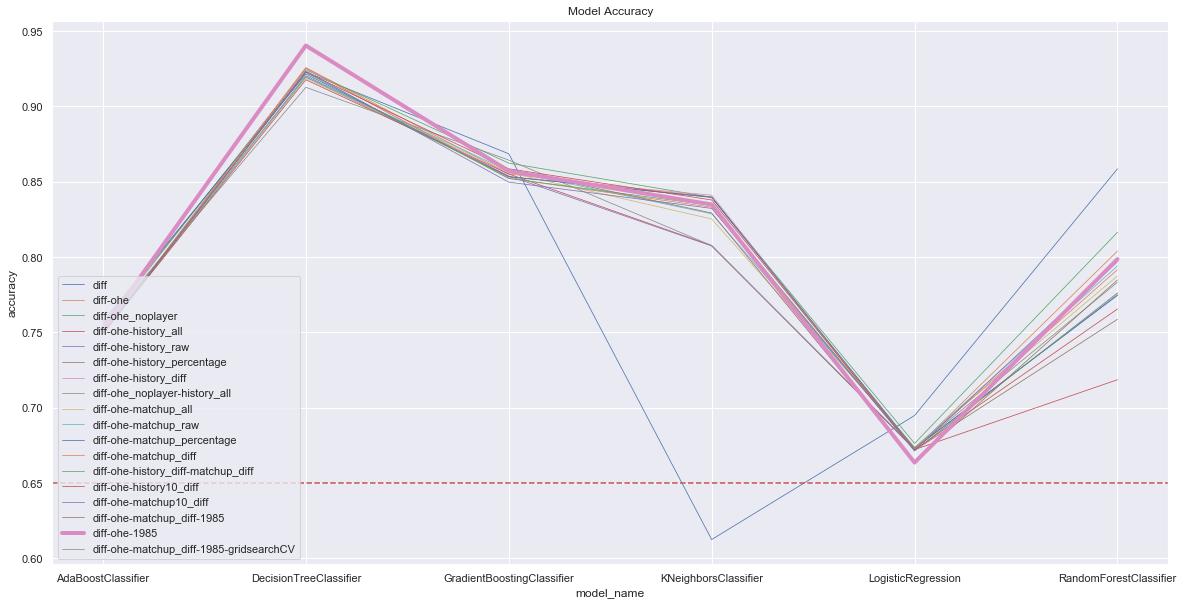

In [38]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

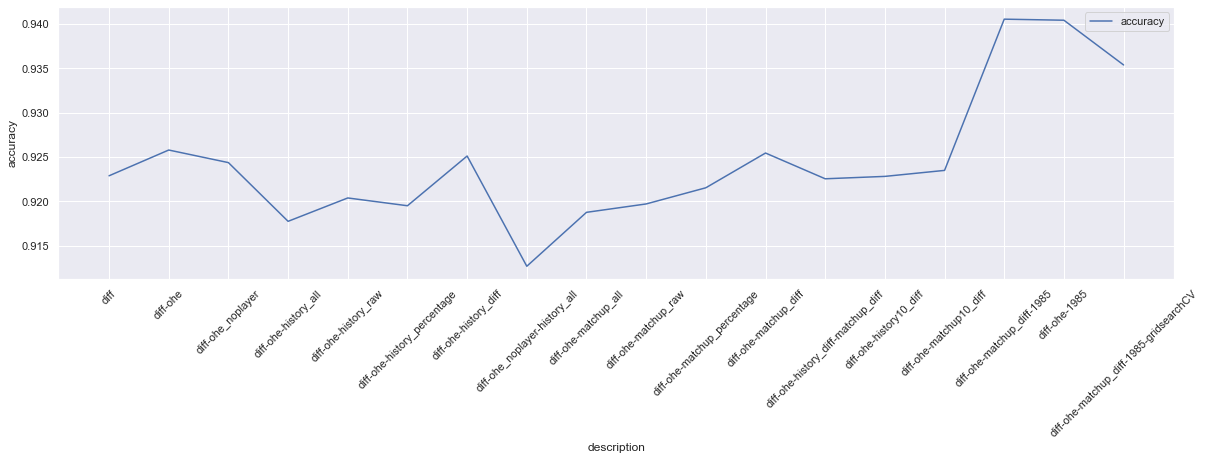

In [39]:
dt_report = report[(report.model_name == 'DecisionTreeClassifier')]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False, label="accuracy")
_ = a.set_label("Decision Tree Classifier Accuracy and ROC/AUC")
_ = plt.xticks(rotation=45)


In [40]:
current_report = report[(report.model_name == 'DecisionTreeClassifier') &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


In [41]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

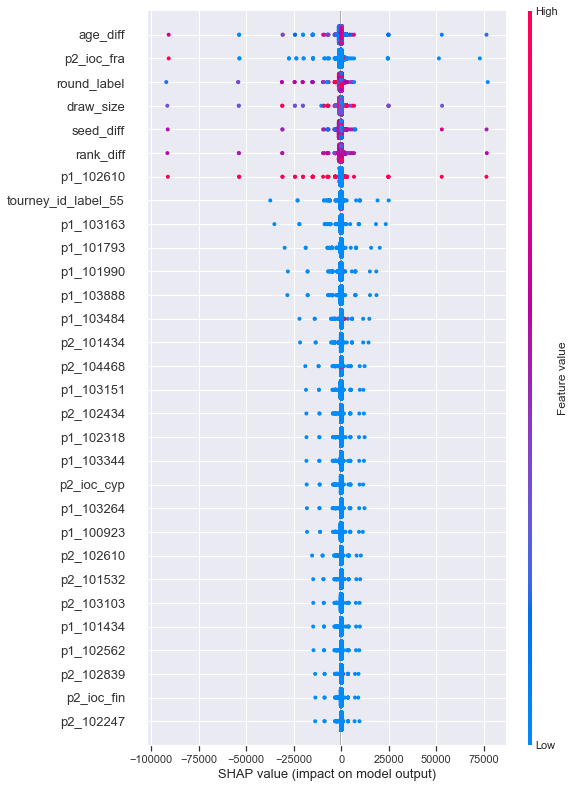

In [42]:
shap.summary_plot(shap_values[1], X_test, max_display=30)

In [43]:
explainer.expected_value

[0.49997997997998, 0.50002002002002]

In [45]:
shap_df = pd.DataFrame(shap_values[1])
shap_df[["age_diff", "p2_ioc_fra", "round_label", "draw_size", "seed_diff", "rank_diff"]].describe()

KeyError: "None of [Index(['age_diff', 'p2_ioc_fra', 'round_label', 'draw_size', 'seed_diff',\n       'rank_diff'],\n      dtype='object')] are in the [columns]"